# Support Vector Machine 

Supervised learning is when you train a machine learning model using labelled data. It means that you have data that already have the right classification associated with them. One common use of supervised learning is to help you predict values for new data.

Unsupervised learning is when you train a model with unlabeled data. This means that the model will have to find its own features and make predictions based on how it classifies the data.

An algorithm is just a customizable math function. That's why most algorithms have things like cost functions, weight values, and parameter functions that you can interchange based on the data you're working with. At its core, machine learning is just a bunch of math equations that need to be solved really fast.

Support vector machines are a set of supervised learning methods used for classification, regression, and outliers detection. All of these are common tasks in machine learning.You can use them to detect cancerous cells based on millions of images or you can use them to predict future driving routes with a well-fitted regression model.

### There are two different types of SVMs, each used for different things:

* Simple SVM: Typically used for linear regression and classification problems.
* Kernel SVM: Has more flexibility for non-linear data because you can add more features to fit a hyperplane instead of a two-dimensional space.

### Why SVMs are used in machine learning
SVMs are used in applications like handwriting recognition, intrusion detection, face detection, email classification, gene classification, and in web pages. This is one of the reasons we use SVMs in machine learning. It can handle both classification and regression on linear and non-linear data.

Another reason we use SVMs is because they can find complex relationships between your data without you needing to do a lot of transformations on your own. It's a great option when you are working with smaller datasets that have tens to hundreds of thousands of features. They typically find more accurate results when compared to other algorithms because of their ability to handle small, complex datasets.

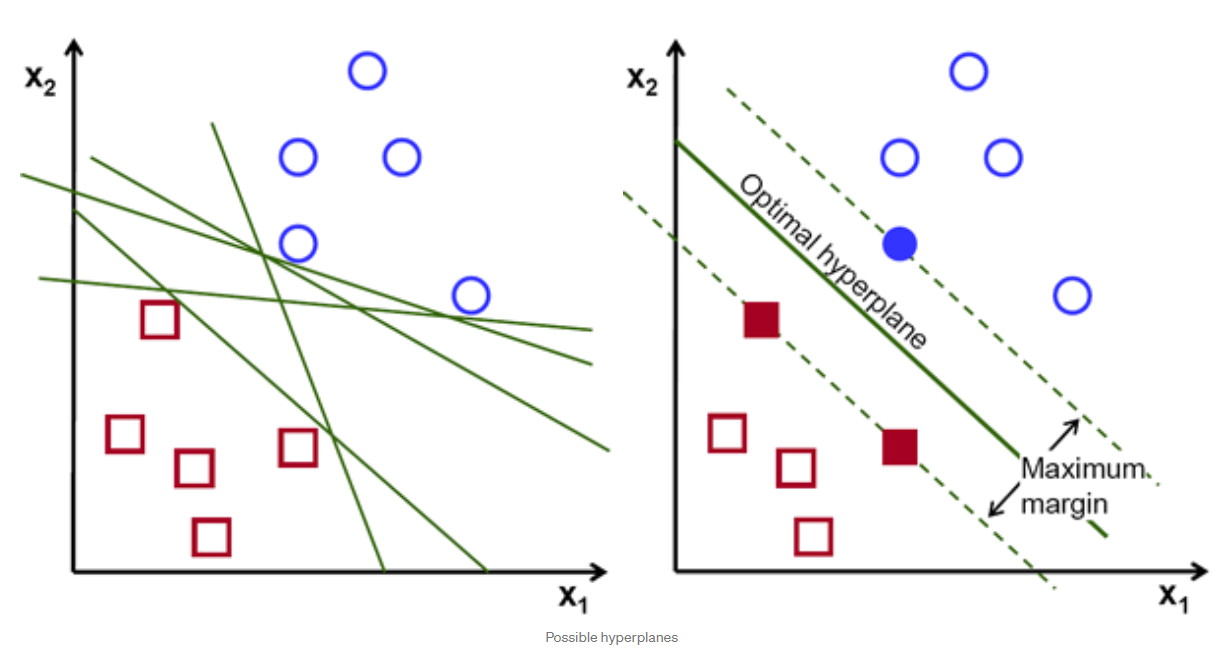
To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

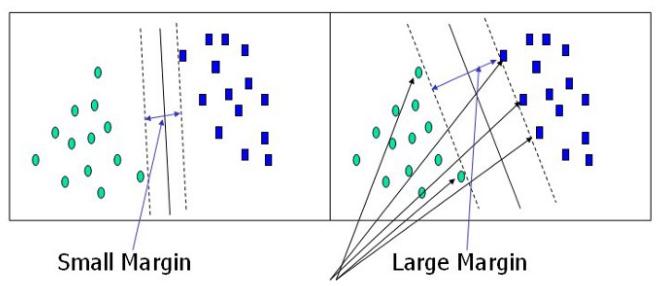
Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

In SVM, we take the output of the linear function and if that output is greater than 1, we identify it with one class and if the output is -1, we identify is with another class. Since the threshold values are changed to 1 and -1 in SVM, we obtain this reinforcement range of values([-1,1]) which acts as margin.

### Cost Function and Gradient Updates
In the SVM algorithm, we are looking to maximize the margin between the data points and the hyperplane. The loss function that helps maximize the margin is hinge loss.

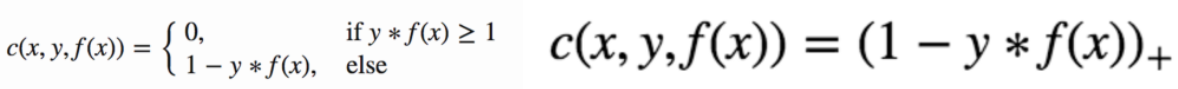
The cost is 0 if the predicted value and the actual value are of the same sign. If they are not, we then calculate the loss value. We also add a regularization parameter the cost function. The objective of the regularization parameter is to balance the margin maximization and loss.

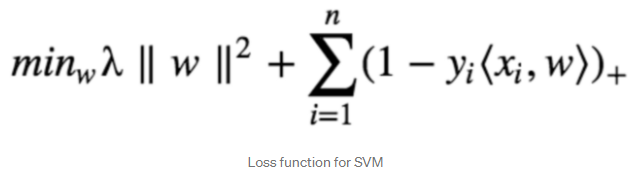
Now that we have the loss function, we take partial derivatives with respect to the weights to find the gradients. Using the gradients, we can update our weights.

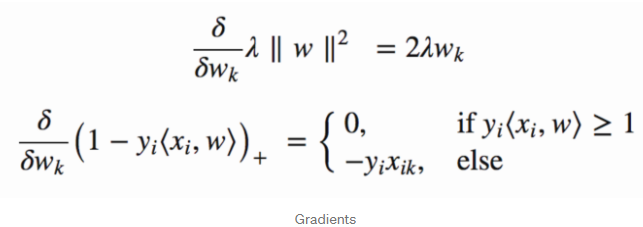
When there is no misclassification, i.e our model correctly predicts the class of our data point, we only have to update the gradient from the regularization parameter.

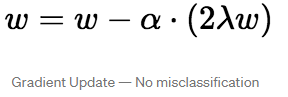
When there is a misclassification, i.e our model make a mistake on the prediction of the class of our data point, we include the loss along with the regularization parameter to perform gradient update.

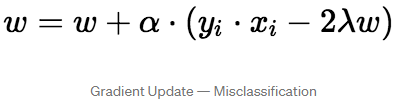

What makes the linear SVM algorithm better than some of the other algorithms, like k-nearest neighbors, is that it chooses the best line to classify your data points. It chooses the line that separates the data and is the furthest away from the closet data points as possible.
The decision boundary doesn't have to be a line. It's also referred to as a hyperplane because you can find the decision boundary with any number of features, not just two.
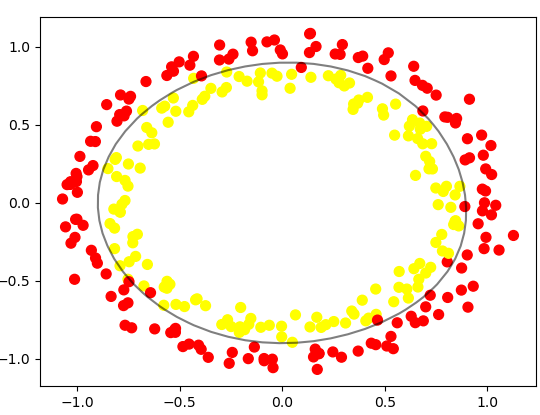

SVM take cares of outliers better than KNN.

If training data is much larger than no. of features(m>>n), KNN is better than SVM. SVM outperforms KNN when there are large features and lesser training data.kNN basically says "if you're close to coordinate x, then the classification will be similar to observed outcomes at x." In SVM, a close analog would be using a high-dimensional kernel with a "small" bandwidth parameter, since this will cause SVM to overfit more. That is, SVM will be closer to "if you're close to coordinate x, then the classification will be similar to those observed at x."

The basic steps to decide which algorithm to use will depend on a number of factors. Few factors which one can look for are listed below:

   * Number of examples in training set.
   * Dimensions of featured space.
   * Do we have correlated features?
   * Is overfitting a problem?

In [29]:
# import data and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv("data.csv")
data.head()
# What kind of tumor is that? 
# A tumor develops when cells reproduce too quickly.
# Tumors can vary in size from a tiny nodule to a large mass, depending on the type, 
# and they can appear almost anywhere on the body.
# There are two main types of tumor:
# Benign: These are not cancerous. They either cannot spread or grow, or they do so very slowly.           = B
# Malignant: Malignant tumors are cancerous. The cells can grow and spread to other parts of the body.     = M

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
# Clean the dataset
data.drop(["Unnamed: 32", "id"],axis=1,inplace=True) # axis : all column, inplace=save in data

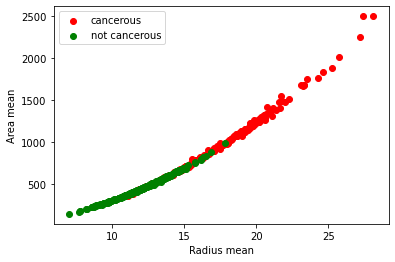

In [31]:
# Visualization of data
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
plt.scatter(M.radius_mean,M.area_mean,color="red",label="cancerous")
plt.scatter(B.radius_mean,B.area_mean,color="green",label="not cancerous")
plt.xlabel("Radius mean")
plt.ylabel("Area mean")
plt.legend()
plt.show()

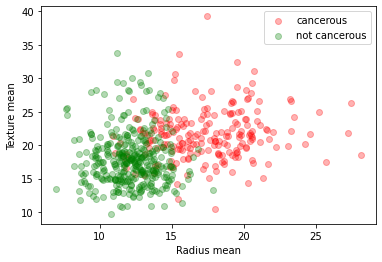

In [32]:
# Visualization of data
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="cancerous",alpha=0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="not cancerous",alpha=0.3)
plt.xlabel("Radius mean")
plt.ylabel("Texture mean")
plt.legend()
plt.show()

In [33]:
# x=features y=label(class)
data.diagnosis = [0 if each == "B" else 1 for each in data.diagnosis ]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1) #the rest of them are my features 

In [34]:
# normalization
# High values of data may override other properties and disrupt this model.
# We will scale all features to 0 - 1 
x = (x_data - np.min(x_data)) / (np.max(x_data) -  np.min(x_data)).values

In [35]:
# Dataset train - test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42) # divide randomly but I will run this code many time
# To keep accuracy, I set to 42, same random way it will divide

In [38]:
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(x_train,y_train)
print("Accuracy of support vector machine algorithm : ", svm.score(x_test,y_test))

Accuracy of support vector machine algorithm :  0.9824561403508771
